In [4]:
import numpy as np
import os
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.patches import Patch

Initialization of data (preprocessed):

In [5]:
path = 'CSV_features_NEW'
folder = 'C:\\Users\\RJEN0307\\Desktop\\Bachelorprojekt\\Bachelor_project_2024\\'

# Combine them using os.path.join for proper path handling
full_path = os.path.join(folder, path)
#print(os.listdir(full_path))


patient_numbers = []
patient_data = {}
r_data = []
m_data = []
f_data = []

all_data = []


for file in os.listdir(full_path):
    filename = os.fsdecode(file)
    patient_number = filename.split('_')[0]  # This will give 'p3' from 'p3_features.csv'
    patient_numbers.append(patient_number)
    patient_file_dir = os.path.join(full_path, filename)
    data = pd.read_csv(patient_file_dir)
    data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
    data['Event'] = data['Event'].map({'R': 0, 'M': 1, 'F': 2})
    standarize_list = ['PSD Delta', 'PSD Delta_N', 'PSD Theta', 'PSD Theta_N', 'PSD Alpha', 'PSD Alpha_N', 'PSD Beta', 'PSD Beta_N', 'PSD Gamma', 'PSD Gamma_N', 'PSD SE', 'PSD MSF', 'PSD Sef90', 'PSD Sef95', 'PE', 'wSMI', 'Kolmogorov', 'Mean RR', 'Std RR', 'Mean HR', 'Std HR', 'Min HR', 'Max HR', 'Freq_Slope mean', 'Freq_Slope std']

    sklearn.preprocessing.StandardScaler().set_output(transform='pandas') 
    data[standarize_list] = sklearn.preprocessing.StandardScaler().fit(data[standarize_list]).transform(data[standarize_list])

    patient_data[patient_number] = data

print(patient_numbers)
print(data)

['p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p3', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p4', 'p50', 'p51', 'p52', 'p53', 'p54', 'p56', 'p57', 'p58', 'p59', 'p5', 'p61', 'p62', 'p63', 'p65', 'p66', 'p67', 'p68', 'p69', 'p6', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p7', 'p80', 'p8', 'p9']
    Index  Event  PSD Delta  PSD Delta_N  PSD Theta  PSD Theta_N  PSD Alpha  \
0       0      0  -0.516558    -0.025100  -1.187800    -0.959477  -0.183442   
1       1      0  -0.256522    -0.174600   0.459543     0.830291   0.176125   
2       2      0   0.285817    -0.651079   1.322821     0.836437   0.034299   
3       0      1  -1.058868    -0.488679  -0.804964     0.381700   0.668305   
4       1      1   1.343412     1.541181   0.244927    -0.963485   0.310033   
5       2      

*Plot of the PSD*

In [6]:
stimuli_colors = {
    1: 'lightblue',   
    2: 'lightgreen' 
}


In [7]:
def plot_eeg_data(ax, data, patient_number, sigma=5):
    time = np.arange(len(data))
    
    delta_smooth = gaussian_filter1d(data['PSD Delta_N'], sigma=sigma)
    theta_smooth = gaussian_filter1d(data['PSD Theta_N'], sigma=sigma)
    alpha_smooth = gaussian_filter1d(data['PSD Alpha_N'], sigma=sigma)
    beta_smooth = gaussian_filter1d(data['PSD Beta_N'], sigma=sigma)
    gamma_smooth = gaussian_filter1d(data['PSD Gamma_N'], sigma=sigma)

    ax.plot(time, delta_smooth, label='Delta (0.5-4 Hz)', color='black', linewidth=1)
    ax.plot(time, theta_smooth, label='Theta (4-8 Hz)', color='gray', linewidth=1)
    ax.plot(time, alpha_smooth, label='Alpha (8-12 Hz)', color='lightgray', linewidth=1)
    ax.plot(time, beta_smooth, label='Beta (12-30 Hz)', color='darkgray', linewidth=1)
    ax.plot(time, gamma_smooth, label='Gamma (>30 Hz)', color='dimgray', linewidth=1)


    event_groups = data['Event'].ne(data['Event'].shift()).cumsum()
    
    for _, group_data in data.groupby(event_groups):
        stimulus_value = group_data['Event'].iloc[0]
        if stimulus_value in stimuli_colors:
            start_idx = group_data.index[0]
            end_idx = group_data.index[-1]
            start_time = time[start_idx]
            end_time = time[end_idx]
            ax.axvspan(start_time, end_time, color=stimuli_colors[stimulus_value], alpha=0.3)
            
    ax.set_title(f'Patient {patient_number}', fontsize=5)  
    ax.grid(False)


In [8]:
def plot_patients(patient_data, patient_numbers):
    num_patients = len(patient_numbers)
    fig, axes = plt.subplots(nrows=num_patients, ncols=1, figsize=(8, num_patients * 2))  # Adjust the figure height


    if num_patients == 1:
        axes = [axes]
    

    for i, patient_number in enumerate(patient_numbers):
        data = patient_data[patient_number] 
        plot_eeg_data(axes[i], data, patient_number)

    stimuli_patches = [
    Patch(color=stimuli_colors[1], label='Medical Staff Voice'),
    Patch(color=stimuli_colors[2], label='Familiar Voice')
    ]
    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    plt.title('') 
    plt.xlabel('') 
    plt.ylabel('')  

    plt.show()


Multiple people plots of PSD

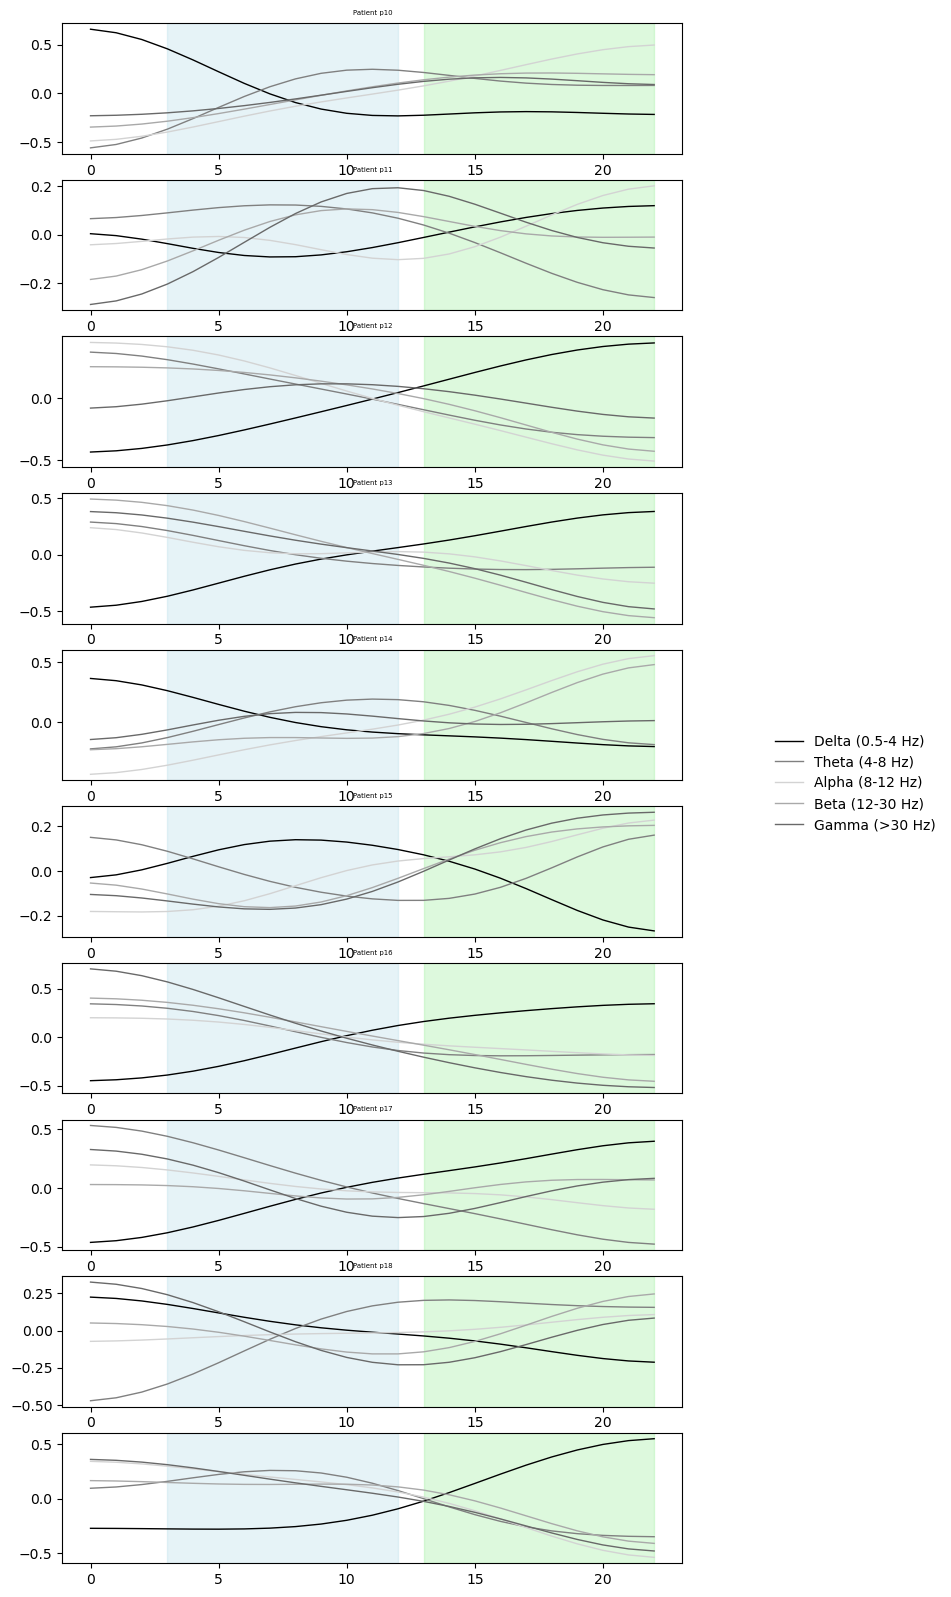

In [9]:
patients_to_plot = patient_numbers[:10]  # Example patient numbers
plot_patients(patient_data, patients_to_plot)